# Spotify - Tunnel Playlist
## What makes a good tunnel playlist?
The goal of this project is to looking into [Spotify's Tunnel playlist](https://open.spotify.com/playlist/0OwZcV6bAN2jqqXmA23Jnw?si=b01b353689a34be8) and identify the key track elements that makes for a good tunnel track.

In [101]:
import config
import pandas as pd
import json
import requests
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# import plotly 
# import plotly.express as px
%matplotlib inline

## Get Authentication

In [2]:
redirect_uri = 'http://localhost:7777/callback'

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=config.client_id,
                                               client_secret=config.client_secret,
                                               redirect_uri=redirect_uri,
                                               scope="user-read-recently-played"))

In [59]:
a_json['tracks']['items'][i]['track']['album']

{'album_type': 'single',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/72l1FxPT1pEy9kuGz2UC1w'},
   'href': 'https://api.spotify.com/v1/artists/72l1FxPT1pEy9kuGz2UC1w',
   'id': '72l1FxPT1pEy9kuGz2UC1w',
   'name': 'RC AVENUE',
   'type': 'artist',
   'uri': 'spotify:artist:72l1FxPT1pEy9kuGz2UC1w'}],
 'available_markets': ['AD',
  'AE',
  'AG',
  'AL',
  'AM',
  'AO',
  'AR',
  'AT',
  'AU',
  'AZ',
  'BA',
  'BB',
  'BD',
  'BE',
  'BF',
  'BG',
  'BH',
  'BI',
  'BJ',
  'BN',
  'BO',
  'BR',
  'BS',
  'BT',
  'BW',
  'BY',
  'BZ',
  'CA',
  'CD',
  'CG',
  'CH',
  'CI',
  'CL',
  'CM',
  'CO',
  'CR',
  'CV',
  'CW',
  'CY',
  'CZ',
  'DE',
  'DJ',
  'DK',
  'DM',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FJ',
  'FM',
  'FR',
  'GA',
  'GB',
  'GD',
  'GE',
  'GH',
  'GM',
  'GN',
  'GQ',
  'GR',
  'GT',
  'GW',
  'GY',
  'HK',
  'HN',
  'HR',
  'HT',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IQ',
  'IS',
  'IT',
  'JM',
  'JO',
  'JP',

In [36]:
track_id_ls = []
track_name_ls = []
artist_pop_ls = []
artist_id_ls = []
artist_name_ls = []
release_date_ls = []

playlist_id = '0OwZcV6bAN2jqqXmA23Jnw?si=7e0fd30e5bd44bfa'

results = sp.playlist(playlist_id, fields=None, market=None, additional_types=('track', ))

json1 = json.dumps(results, indent=4)
a_json = json.loads(json1)
print(len(a_json['tracks']['items']))


for i in range(len(a_json['tracks']['items'])):
    track_id_ls.append(a_json['tracks']['items'][i]['track']['id'])
    track_name_ls.append(a_json['tracks']['items'][i]['track']['name'])
    artist_pop_ls.append(a_json['tracks']['items'][i]['track']['popularity'])
    artist_id_ls.append(a_json['tracks']['items'][i]['track']['album']['artists'][0]['id'])
    artist_name_ls.append(a_json['tracks']['items'][i]['track']['album']['artists'][0]['name'])
    release_date_ls.append(a_json['tracks']['items'][i]['track']['album']['release_date'])

44


In [37]:
playlist_df = pd.DataFrame(list(zip(track_id_ls, track_name_ls, artist_pop_ls, artist_id_ls, artist_name_ls, release_date_ls)),
               columns =['track_id', 'track_name', 'artist_popularity','artist_id', 'artist_name', 'release_date'])
playlist_df

,track_id,track_name,artist_popularity,artist_id,artist_name,release_date
0,0I1eFRytp4XRhLCjT6tZm7,I Can't Handle Change,83,7dIpKWlEeAljA20vFJ82RD,Roar,2010-03-14
1,0ntQJM78wzOLVeCUAW7Y45,Sex on Fire,82,2qk9voo8llSGYcZ6xrBzKx,Kings of Leon,2008-09-23
2,6N22FZs2ZhPBYi3b9XPajV,Still Don't Know My Name,80,2feDdbD5araYcm6JhFHHw7,Labrinth,2019-10-04
3,1Fwj0wThn3kTg8D7KgWdsU,My Tears Are Becoming A Sea,63,63MQldklfxkjYDoUE4Tppz,M83,2011
4,7Jh1bpe76CNTCgdgAdBw4Z,Heroes - 2017 Remaster,76,0oSGxfWSnnOXhD2fKuz2Gy,David Bowie,1977
5,45S5WTQEGOB1VHr1Q4FuPl,Golden,84,6KImCVD70vtIoJWnq6nGn3,Harry Styles,2019-12-13
6,1eyzqe2QqGZUmfcPZtrIyt,Midnight City,73,63MQldklfxkjYDoUE4Tppz,M83,2011
7,3GCdLUSnKSMJhs4Tj6CV3s,All The Stars (with SZA),82,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,2018-02-09
8,6VzcQuzTNTMFnJ6rBSaLH9,Fine Line,79,6KImCVD70vtIoJWnq6nGn3,Harry Styles,2019-12-13
9,5SO2xwVkn1iu8f5eSxvSdR,Symphonia IX,48,0m5FakHKCQdA7UN0PIzMcL,Current Joys,2013-01-02


In [38]:
playlist_df['release_date_clean'] = pd.to_datetime(playlist_df['release_date'])
playlist_df['release_date_year'] = playlist_df['release_date_clean'].dt.strftime('%Y')
playlist_df

,track_id,track_name,artist_popularity,artist_id,artist_name,release_date,release_date_clean,release_date_year
0,0I1eFRytp4XRhLCjT6tZm7,I Can't Handle Change,83,7dIpKWlEeAljA20vFJ82RD,Roar,2010-03-14,2010-03-14,2010
1,0ntQJM78wzOLVeCUAW7Y45,Sex on Fire,82,2qk9voo8llSGYcZ6xrBzKx,Kings of Leon,2008-09-23,2008-09-23,2008
2,6N22FZs2ZhPBYi3b9XPajV,Still Don't Know My Name,80,2feDdbD5araYcm6JhFHHw7,Labrinth,2019-10-04,2019-10-04,2019
3,1Fwj0wThn3kTg8D7KgWdsU,My Tears Are Becoming A Sea,63,63MQldklfxkjYDoUE4Tppz,M83,2011,2011-01-01,2011
4,7Jh1bpe76CNTCgdgAdBw4Z,Heroes - 2017 Remaster,76,0oSGxfWSnnOXhD2fKuz2Gy,David Bowie,1977,1977-01-01,1977
5,45S5WTQEGOB1VHr1Q4FuPl,Golden,84,6KImCVD70vtIoJWnq6nGn3,Harry Styles,2019-12-13,2019-12-13,2019
6,1eyzqe2QqGZUmfcPZtrIyt,Midnight City,73,63MQldklfxkjYDoUE4Tppz,M83,2011,2011-01-01,2011
7,3GCdLUSnKSMJhs4Tj6CV3s,All The Stars (with SZA),82,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,2018-02-09,2018-02-09,2018
8,6VzcQuzTNTMFnJ6rBSaLH9,Fine Line,79,6KImCVD70vtIoJWnq6nGn3,Harry Styles,2019-12-13,2019-12-13,2019
9,5SO2xwVkn1iu8f5eSxvSdR,Symphonia IX,48,0m5FakHKCQdA7UN0PIzMcL,Current Joys,2013-01-02,2013-01-02,2013


## Get Audio Features for All Tracks

In [39]:
results2 = sp.audio_features(tracks=track_id_ls)
track_df = pd.json_normalize(results2)
track_df.rename(columns={'id':'track_id'}, inplace=True)
track_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,track_id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.247,0.438,5,-8.478,1,0.0358,0.044700,0.000867,0.1110,0.3900,185.711,audio_features,0I1eFRytp4XRhLCjT6tZm7,spotify:track:0I1eFRytp4XRhLCjT6tZm7,https://api.spotify.com/v1/tracks/0I1eFRytp4XR...,https://api.spotify.com/v1/audio-analysis/0I1e...,198213,3
1,0.542,0.905,9,-5.653,1,0.0540,0.001720,0.010400,0.1360,0.3740,153.398,audio_features,0ntQJM78wzOLVeCUAW7Y45,spotify:track:0ntQJM78wzOLVeCUAW7Y45,https://api.spotify.com/v1/tracks/0ntQJM78wzOL...,https://api.spotify.com/v1/audio-analysis/0ntQ...,203347,4
2,0.316,0.630,5,-5.963,1,0.1170,0.471000,0.262000,0.2050,0.3130,89.643,audio_features,6N22FZs2ZhPBYi3b9XPajV,spotify:track:6N22FZs2ZhPBYi3b9XPajV,https://api.spotify.com/v1/tracks/6N22FZs2ZhPB...,https://api.spotify.com/v1/audio-analysis/6N22...,153294,1
3,0.194,0.376,4,-11.356,1,0.0463,0.110000,0.386000,0.5930,0.0723,48.637,audio_features,1Fwj0wThn3kTg8D7KgWdsU,spotify:track:1Fwj0wThn3kTg8D7KgWdsU,https://api.spotify.com/v1/tracks/1Fwj0wThn3kT...,https://api.spotify.com/v1/audio-analysis/1Fwj...,151827,3
4,0.490,0.758,7,-6.491,1,0.0297,0.000671,0.484000,0.0920,0.4350,112.114,audio_features,7Jh1bpe76CNTCgdgAdBw4Z,spotify:track:7Jh1bpe76CNTCgdgAdBw4Z,https://api.spotify.com/v1/tracks/7Jh1bpe76CNT...,https://api.spotify.com/v1/audio-analysis/7Jh1...,371413,4
5,0.448,0.838,4,-5.257,0,0.0557,0.210000,0.000131,0.1310,0.2540,139.863,audio_features,45S5WTQEGOB1VHr1Q4FuPl,spotify:track:45S5WTQEGOB1VHr1Q4FuPl,https://api.spotify.com/v1/tracks/45S5WTQEGOB1...,https://api.spotify.com/v1/audio-analysis/45S5...,208907,4
6,0.526,0.712,11,-6.525,0,0.0356,0.016100,0.000000,0.1790,0.3200,105.009,audio_features,1eyzqe2QqGZUmfcPZtrIyt,spotify:track:1eyzqe2QqGZUmfcPZtrIyt,https://api.spotify.com/v1/tracks/1eyzqe2QqGZU...,https://api.spotify.com/v1/audio-analysis/1eyz...,241440,4
7,0.698,0.633,8,-4.946,1,0.0597,0.060500,0.000194,0.0926,0.5520,96.924,audio_features,3GCdLUSnKSMJhs4Tj6CV3s,spotify:track:3GCdLUSnKSMJhs4Tj6CV3s,https://api.spotify.com/v1/tracks/3GCdLUSnKSMJ...,https://api.spotify.com/v1/audio-analysis/3GCd...,232187,4
8,0.306,0.347,2,-8.500,1,0.0334,0.172000,0.000130,0.0485,0.0511,120.996,audio_features,6VzcQuzTNTMFnJ6rBSaLH9,spotify:track:6VzcQuzTNTMFnJ6rBSaLH9,https://api.spotify.com/v1/tracks/6VzcQuzTNTMF...,https://api.spotify.com/v1/audio-analysis/6Vzc...,377960,4
9,0.593,0.380,0,-12.682,1,0.0247,0.913000,0.573000,0.2890,0.1490,99.323,audio_features,5SO2xwVkn1iu8f5eSxvSdR,spotify:track:5SO2xwVkn1iu8f5eSxvSdR,https://api.spotify.com/v1/tracks/5SO2xwVkn1iu...,https://api.spotify.com/v1/audio-analysis/5SO2...,181360,4


## Get Artist Data

In [70]:
artist_json['artists'][0]['genres']

['indie pop', 'weirdcore']

In [60]:
artist_json = sp.artists(artists=artist_id_ls)
artist_json

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7dIpKWlEeAljA20vFJ82RD'},
   'followers': {'href': None, 'total': 294044},
   'genres': ['indie pop', 'weirdcore'],
   'href': 'https://api.spotify.com/v1/artists/7dIpKWlEeAljA20vFJ82RD',
   'id': '7dIpKWlEeAljA20vFJ82RD',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b27373b8b921631896395cc3b6b8',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/ab67616d00001e02d72f734a66c2b545facd7517',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/ab67616d0000485173b8b921631896395cc3b6b8',
     'width': 64}],
   'name': 'Roar',
   'popularity': 69,
   'type': 'artist',
   'uri': 'spotify:artist:7dIpKWlEeAljA20vFJ82RD'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/2qk9voo8llSGYcZ6xrBzKx'},
   'followers': {'href': None, 'total': 4894558},
   'genres': ['modern rock', 'rock'],
   'href': 'https://api.spotify.com/v1/a

In [72]:
genres_ls = []
followers_ls = []
artist_name_ls2 = []
artist_id_ls2 = []
popularity_ls2 = []

for i in range(len(artist_json['artists'])):
    genres_ls.append(artist_json['artists'][i]['genres'])
    followers_ls.append(artist_json['artists'][i]['followers']['total'])
    artist_name_ls2.append(artist_json['artists'][i]['name'])
    artist_id_ls2.append(artist_json['artists'][i]['id'])
    popularity_ls2.append(artist_json['artists'][i]['popularity'])


In [73]:
artist_df = pd.DataFrame(list(zip(genres_ls, followers_ls, artist_name_ls2, artist_id_ls2, popularity_ls2)),
               columns =['genres', 'follower_count', 'artist_name','artist_id', 'artist_popularity'])
artist_df

,genres,follower_count,artist_name,artist_id,artist_popularity
0,"[indie pop, weirdcore]",294044,Roar,7dIpKWlEeAljA20vFJ82RD,69
1,"[modern rock, rock]",4894558,Kings of Leon,2qk9voo8llSGYcZ6xrBzKx,78
2,"[indie poptimism, pop]",1771002,Labrinth,2feDdbD5araYcm6JhFHHw7,81
3,"[french shoegaze, french synthpop, indietronic...",1991479,M83,63MQldklfxkjYDoUE4Tppz,73
4,"[art rock, classic rock, glam rock, permanent ...",7572228,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,81
5,[pop],18207557,Harry Styles,6KImCVD70vtIoJWnq6nGn3,87
6,"[french shoegaze, french synthpop, indietronic...",1991479,M83,63MQldklfxkjYDoUE4Tppz,73
7,"[conscious hip hop, hip hop, rap, west coast rap]",18942014,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,90
8,[pop],18207557,Harry Styles,6KImCVD70vtIoJWnq6nGn3,87
9,"[indie pop, lo-fi indie]",607086,Current Joys,0m5FakHKCQdA7UN0PIzMcL,72


### Bring track popularity into track_df

In [40]:
track_df_main = track_df.merge(playlist_df, on='track_id', how='left')
track_df_main

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,analysis_url,duration_ms,time_signature,track_name,artist_popularity,artist_id,artist_name,release_date,release_date_clean,release_date_year
0,0.247,0.438,5,-8.478,1,0.0358,0.044700,0.000867,0.1110,0.3900,...,https://api.spotify.com/v1/audio-analysis/0I1e...,198213,3,I Can't Handle Change,83,7dIpKWlEeAljA20vFJ82RD,Roar,2010-03-14,2010-03-14,2010
1,0.542,0.905,9,-5.653,1,0.0540,0.001720,0.010400,0.1360,0.3740,...,https://api.spotify.com/v1/audio-analysis/0ntQ...,203347,4,Sex on Fire,82,2qk9voo8llSGYcZ6xrBzKx,Kings of Leon,2008-09-23,2008-09-23,2008
2,0.316,0.630,5,-5.963,1,0.1170,0.471000,0.262000,0.2050,0.3130,...,https://api.spotify.com/v1/audio-analysis/6N22...,153294,1,Still Don't Know My Name,80,2feDdbD5araYcm6JhFHHw7,Labrinth,2019-10-04,2019-10-04,2019
3,0.194,0.376,4,-11.356,1,0.0463,0.110000,0.386000,0.5930,0.0723,...,https://api.spotify.com/v1/audio-analysis/1Fwj...,151827,3,My Tears Are Becoming A Sea,63,63MQldklfxkjYDoUE4Tppz,M83,2011,2011-01-01,2011
4,0.490,0.758,7,-6.491,1,0.0297,0.000671,0.484000,0.0920,0.4350,...,https://api.spotify.com/v1/audio-analysis/7Jh1...,371413,4,Heroes - 2017 Remaster,76,0oSGxfWSnnOXhD2fKuz2Gy,David Bowie,1977,1977-01-01,1977
5,0.448,0.838,4,-5.257,0,0.0557,0.210000,0.000131,0.1310,0.2540,...,https://api.spotify.com/v1/audio-analysis/45S5...,208907,4,Golden,84,6KImCVD70vtIoJWnq6nGn3,Harry Styles,2019-12-13,2019-12-13,2019
6,0.526,0.712,11,-6.525,0,0.0356,0.016100,0.000000,0.1790,0.3200,...,https://api.spotify.com/v1/audio-analysis/1eyz...,241440,4,Midnight City,73,63MQldklfxkjYDoUE4Tppz,M83,2011,2011-01-01,2011
7,0.698,0.633,8,-4.946,1,0.0597,0.060500,0.000194,0.0926,0.5520,...,https://api.spotify.com/v1/audio-analysis/3GCd...,232187,4,All The Stars (with SZA),82,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,2018-02-09,2018-02-09,2018
8,0.306,0.347,2,-8.500,1,0.0334,0.172000,0.000130,0.0485,0.0511,...,https://api.spotify.com/v1/audio-analysis/6Vzc...,377960,4,Fine Line,79,6KImCVD70vtIoJWnq6nGn3,Harry Styles,2019-12-13,2019-12-13,2019
9,0.593,0.380,0,-12.682,1,0.0247,0.913000,0.573000,0.2890,0.1490,...,https://api.spotify.com/v1/audio-analysis/5SO2...,181360,4,Symphonia IX,48,0m5FakHKCQdA7UN0PIzMcL,Current Joys,2013-01-02,2013-01-02,2013


## Sort by Popularity of Track

In [42]:
sorted_df = track_df_main.sort_values('artist_popularity', ascending = False)
sorted_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,analysis_url,duration_ms,time_signature,track_name,artist_popularity,artist_id,artist_name,release_date,release_date_clean,release_date_year
5,0.448,0.838,4,-5.257,0,0.0557,0.21000,0.000131,0.131,0.254,...,https://api.spotify.com/v1/audio-analysis/45S5...,208907,4,Golden,84,6KImCVD70vtIoJWnq6nGn3,Harry Styles,2019-12-13,2019-12-13,2019
20,0.611,0.797,6,-7.627,0,0.0533,0.00543,0.001370,0.260,0.518,...,https://api.spotify.com/v1/audio-analysis/2GiJ...,218107,4,Electric Love,84,1KP6TWI40m7p3QBTU6u2xo,BØRNS,2015-10-16,2015-10-16,2015
0,0.247,0.438,5,-8.478,1,0.0358,0.04470,0.000867,0.111,0.390,...,https://api.spotify.com/v1/audio-analysis/0I1e...,198213,3,I Can't Handle Change,83,7dIpKWlEeAljA20vFJ82RD,Roar,2010-03-14,2010-03-14,2010
37,0.574,0.664,11,-6.068,1,0.0409,0.04480,0.055300,0.146,0.226,...,https://api.spotify.com/v1/audio-analysis/6EtK...,91870,4,Formula,83,2feDdbD5araYcm6JhFHHw7,Labrinth,2019-10-04,2019-10-04,2019
25,0.645,0.795,7,-12.095,1,0.0527,0.34700,0.003890,0.104,0.535,...,https://api.spotify.com/v1/audio-analysis/4RvW...,251489,4,Everybody Wants To Rule The World,83,4bthk9UfsYUYdcFyqxmSUU,Tears For Fears,1985-02-25,1985-02-25,1985


## Data Checks and Clean-Up

In [43]:
track_df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   danceability        44 non-null     float64       
 1   energy              44 non-null     float64       
 2   key                 44 non-null     int64         
 3   loudness            44 non-null     float64       
 4   mode                44 non-null     int64         
 5   speechiness         44 non-null     float64       
 6   acousticness        44 non-null     float64       
 7   instrumentalness    44 non-null     float64       
 8   liveness            44 non-null     float64       
 9   valence             44 non-null     float64       
 10  tempo               44 non-null     float64       
 11  type                44 non-null     object        
 12  track_id            44 non-null     object        
 13  uri                 44 non-null     object        
 

In [44]:
track_df_main.isnull().sum()

danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
type                  0
track_id              0
uri                   0
track_href            0
analysis_url          0
duration_ms           0
time_signature        0
track_name            0
artist_popularity     0
artist_id             0
artist_name           0
release_date          0
release_date_clean    0
release_date_year     0
dtype: int64

#### Change mode to major or minor

In [102]:
mod_dict = {0 : 'minor',
            1: 'major'}

track_df_main['mode'].replace(mod_dict, inplace=True)

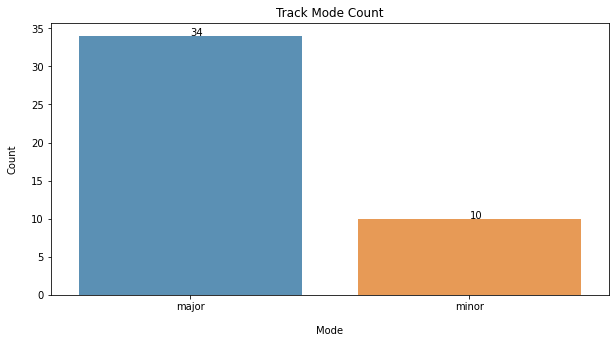

In [149]:
mode_data = track_df_main['mode'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=mode_data.index, y=mode_data.values, alpha=0.8)
plt.title("Track Mode Count")
plt.xlabel("Mode", labelpad=14)
plt.ylabel("Count", labelpad=14)

for index, value in enumerate(mode_data):
    plt.text(index,value, str(value))

plt.show()

<AxesSubplot:>

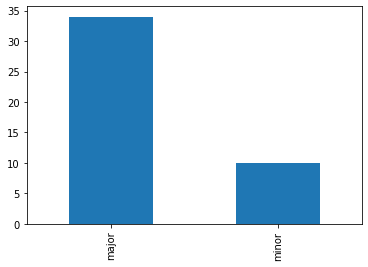

In [132]:
track_df_main['mode'].value_counts().plot(kind='bar')

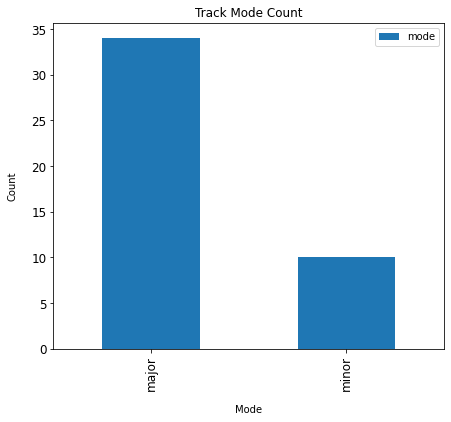

In [112]:
track_df_main['mode'].value_counts().plot(kind='bar', title ="Track Mode Count", 
                                               figsize=(7, 6), legend=True, fontsize=12)
plt.xlabel("Mode", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.show()

In [50]:
#number of times charted by artist
df_numbercharted = track_df_main.groupby('artist_name').mean().sort_values('artist_popularity', ascending=False)
df_numbercharted = df_numbercharted.reset_index()
df_numbercharted

,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_popularity
0,BØRNS,0.611000,0.797000,6.000000,-7.627000,0.000000,0.053300,0.005430,0.001370,0.260000,0.518000,120.041000,218107.000000,4.000000,84.000000
1,Tears For Fears,0.645000,0.795000,7.000000,-12.095000,1.000000,0.052700,0.347000,0.003890,0.104000,0.535000,112.067000,251489.000000,4.000000,83.000000
2,Roar,0.247000,0.438000,5.000000,-8.478000,1.000000,0.035800,0.044700,0.000867,0.111000,0.390000,185.711000,198213.000000,3.000000,83.000000
3,Kendrick Lamar,0.698000,0.633000,8.000000,-4.946000,1.000000,0.059700,0.060500,0.000194,0.092600,0.552000,96.924000,232187.000000,4.000000,82.000000
4,Cults,0.174000,0.742000,8.000000,-5.930000,1.000000,0.048500,0.001810,0.281000,0.198000,0.360000,163.378000,223747.000000,4.000000,82.000000
5,Kings of Leon,0.542000,0.905000,9.000000,-5.653000,1.000000,0.054000,0.001720,0.010400,0.136000,0.374000,153.398000,203347.000000,4.000000,82.000000
6,Dayglow,0.641000,0.842000,9.000000,-7.270000,1.000000,0.029200,0.132000,0.910000,0.419000,0.500000,129.980000,278769.000000,4.000000,82.000000
7,Labrinth,0.445000,0.647000,8.000000,-6.015500,1.000000,0.078950,0.257900,0.158650,0.175500,0.269500,117.148500,122582.000000,2.500000,81.500000
8,Harry Styles,0.377000,0.592500,3.000000,-6.878500,0.500000,0.044550,0.191000,0.000131,0.089750,0.152550,130.429500,293433.500000,4.000000,81.500000
9,Grouplove,0.560000,0.936000,3.000000,-5.835000,1.000000,0.043900,0.008470,0.000000,0.161000,0.371000,112.960000,218013.000000,4.000000,81.000000


In [51]:
px.bar(x='artist_name', y='artist_popularity', data_frame=df_numbercharted.head(7), 
       title="Top 7 Artists with Highest Popularity on Spotify")


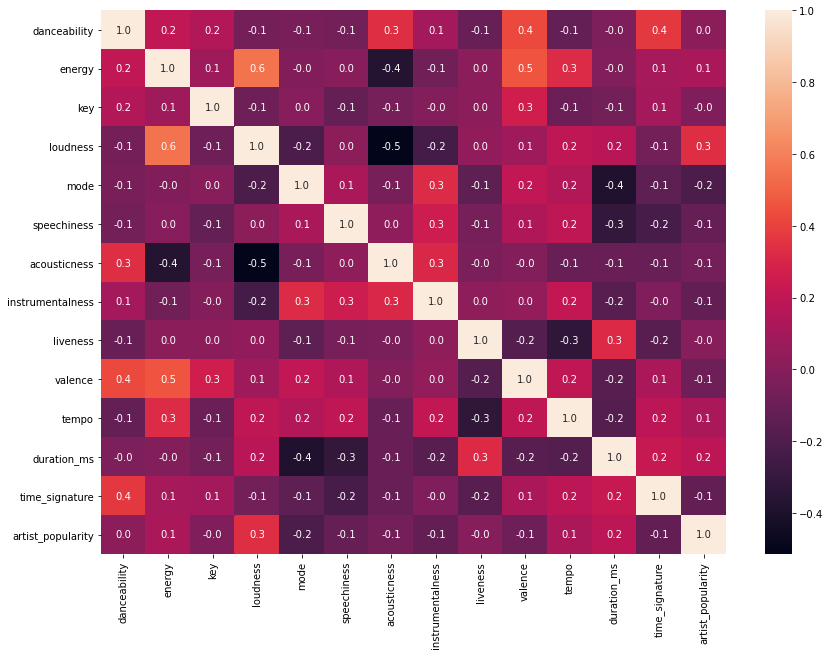

In [52]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(track_df_main.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

In [57]:
dance_check = track_df_main.sort_values('release_date_year', ascending=True)
dance_check

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,analysis_url,duration_ms,time_signature,track_name,artist_popularity,artist_id,artist_name,release_date,release_date_clean,release_date_year
29,0.380,0.760,9,-10.961,1,0.0378,0.002980,0.029400,0.1040,0.4910,...,https://api.spotify.com/v1/audio-analysis/24Nw...,274133,4,Sweet Emotion,74,7Ey4PD4MYsKc5I2dolUwbH,Aerosmith,1975-04-08,1975-04-08,1975
4,0.490,0.758,7,-6.491,1,0.0297,0.000671,0.484000,0.0920,0.4350,...,https://api.spotify.com/v1/audio-analysis/7Jh1...,371413,4,Heroes - 2017 Remaster,76,0oSGxfWSnnOXhD2fKuz2Gy,David Bowie,1977,1977-01-01,1977
25,0.645,0.795,7,-12.095,1,0.0527,0.347000,0.003890,0.1040,0.5350,...,https://api.spotify.com/v1/audio-analysis/4RvW...,251489,4,Everybody Wants To Rule The World,83,4bthk9UfsYUYdcFyqxmSUU,Tears For Fears,1985-02-25,1985-02-25,1985
12,0.518,0.436,4,-14.134,1,0.0349,0.015700,0.000621,0.0790,0.2700,...,https://api.spotify.com/v1/audio-analysis/6mcx...,236973,4,Where Is My Mind?,4,6zvul52xwTWzilBZl6BUbT,Pixies,1988,1988-01-01,1988
28,0.577,0.749,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.2550,...,https://api.spotify.com/v1/audio-analysis/0BCP...,307880,4,Clocks,80,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,2002-08-08,2002-08-08,2002
16,0.438,0.940,2,-3.249,1,0.0452,0.000087,0.077700,0.3000,0.4210,...,https://api.spotify.com/v1/audio-analysis/4iG2...,261000,3,Time to Pretend,73,0SwO7SWeDHJijQ3XNS7xEE,MGMT,2007-12-14,2007-12-14,2007
34,0.520,0.852,0,-5.866,1,0.0543,0.002370,0.000058,0.0733,0.2340,...,https://api.spotify.com/v1/audio-analysis/58ge...,253587,4,505,80,7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,2007-04-24,2007-04-24,2007
1,0.542,0.905,9,-5.653,1,0.0540,0.001720,0.010400,0.1360,0.3740,...,https://api.spotify.com/v1/audio-analysis/0ntQ...,203347,4,Sex on Fire,82,2qk9voo8llSGYcZ6xrBzKx,Kings of Leon,2008-09-23,2008-09-23,2008
0,0.247,0.438,5,-8.478,1,0.0358,0.044700,0.000867,0.1110,0.3900,...,https://api.spotify.com/v1/audio-analysis/0I1e...,198213,3,I Can't Handle Change,83,7dIpKWlEeAljA20vFJ82RD,Roar,2010-03-14,2010-03-14,2010
41,0.454,0.820,2,-4.193,1,0.0567,0.132000,0.000969,0.1150,0.5750,...,https://api.spotify.com/v1/audio-analysis/0UV5...,234800,4,Where'd All the Time Go?,79,4mLJ3XfOM5FPjSAWdQ2Jk7,Dr. Dog,2010-11-02,2010-11-02,2010


In [58]:
px.line(x='release_date_year', y='danceability', data_frame=dance_check, title="Danceability over the course of the Year")

### Major or Minor